In [1]:
import supriya
from supriya import Envelope, synthdef
from supriya.ugens import EnvGen, Out, SinOsc

In [ ]:
# Connect to the remote server and set up the default group (which doesn’t get created by default).
# Suppress async error reporting to hack around Supriya’s expectation that the parent group will exist in its local store.
# Start the remote server with something like scsynth -u 57110 -B 0.0.0.0
server = supriya.Server().connect(ip_address="172.28.160.1", port=57110)
supriya.osc.threaded.ThreadedOscProtocol.Server.handle_error = lambda *_: None
server._add_requests(supriya.contexts.requests.NewGroup(items=[(1,0,0)]))
server.sync()
del supriya.osc.threaded.ThreadedOscProtocol.Server.handle_error

In [3]:
group = server.add_group()

In [4]:
@synthdef()
def simple_sine(frequency=440, amplitude=0.1, gate=1):
    sine = SinOsc.ar(frequency=frequency) * amplitude
    envelope = EnvGen.kr(envelope=Envelope.adsr(), gate=gate, done_action=2)
    Out.ar(bus=0, source=[sine * envelope] * 2)

In [5]:
server.add_synthdefs(simple_sine)
server.sync()

<Server ONLINE [/usr/local/bin/scsynth -B 172.28.160.1 -R 0 -l 1 -u 57110]>

In [6]:
group.add_synth(simple_sine, frequency=440/2)

Synth(context=<Server ONLINE [/usr/local/bin/scsynth -B 172.28.160.1 -R 0 -l 1 -u 57110]>, id_=1001, synthdef=<SynthDef: simple_sine>)

In [14]:
print(server.query_tree())

NODE TREE 0 group
    1 group
        1000 group



In [13]:
group.free_children()

In [29]:
import pydot
from IPython.display import SVG, display

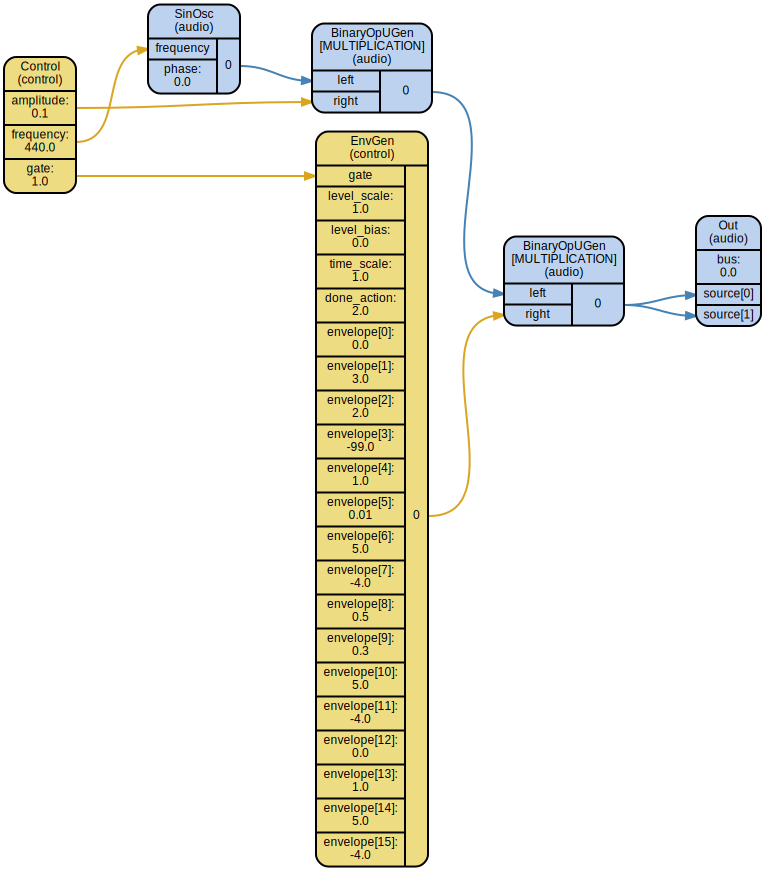

In [30]:
graph = simple_sine.__graph__()
display(SVG(pydot.graph_from_dot_data(graph.__format_graphviz__())[0].create_svg()))